In [ ]:
!pip install tensorflow
!pip install stable_baselines3
!pip install gym
!pip install gym-anytrading
!pip install tensorflow-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 6.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Gym stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - RL stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load GME trading data
df = pd.read_csv('gmedata.csv')

# Convert data to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

# Set Date as the index
df.set_index('Date', inplace=True)
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [ ]:
# Create the environment
env = gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)

# Explore the environment
env.action_space

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Discrete(2)

In [ ]:
# View environment features
env.unwrapped.signal_features

array([[ 2.6450e+02,  0.0000e+00],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,

In [ ]:
# View environment prices
env.unwrapped.prices

array([264.5 , 260.  , 265.  , 246.9 , 194.5 , 137.74, 132.35, 124.18,
       118.18, 120.4 , 101.74, 108.73,  91.71,  44.97,  46.  ,  40.59,
        40.69,  45.94,  49.51,  52.4 ,  51.1 ,  51.2 ,  50.31,  60.  ,
        63.77,  53.5 ,  92.41,  90.  , 225.  , 325.  , 193.6 , 347.51,
       147.98,  76.79,  65.01,  43.03,  39.12,  39.36,  35.5 ,  39.91,
        31.4 ,  19.95,  19.94,  17.69,  18.08,  18.36,  17.37,  17.25,
        18.84,  19.26,  19.38,  20.99,  20.15,  20.57,  19.46,  15.53,
        15.63,  14.83,  13.85,  13.85,  12.72,  13.31,  14.12,  13.66,
        16.94,  16.35,  16.9 ,  16.12,  16.58,  15.8 ,  16.56,  16.08,
        14.75,  13.67,  13.9 ,  12.71,  12.46,  11.57,  11.63,  12.06,
        11.01,  11.13,  11.75,  11.1 ,  11.49,  11.86,  11.45,  10.91,
        11.57,  10.75,  10.47,  11.73,  11.82,  12.69,  13.45,  15.  ,
        14.91,  14.1 ,  13.86,  13.91], dtype=float32)

info {'total_reward': 165.2800054550171, 'total_profit': 1.2660997120632607, 'position': <Positions.Long: 1>}


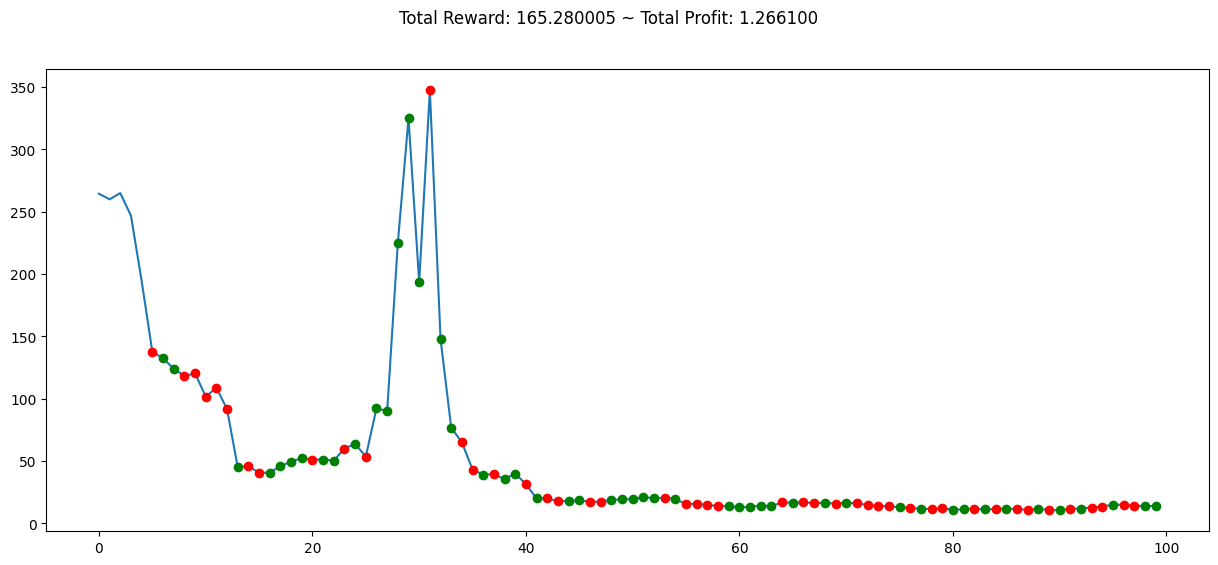

In [ ]:
observation = env.reset(seed=2023)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()

In [ ]:
# Creating our dummy vectorizing environment
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)
env = DummyVecEnv([env_maker])

model = PPO('MlpPolicy', env,verbose=1)
model.learn(total_timesteps=1000000)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
|    time_elapsed         | 396          |
|    total_timesteps      | 434176       |
| train/                  |              |
|    approx_kl            | 0.0032750985 |
|    clip_fraction        | 0.024        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.104       |
|    explained_variance   | 0.974        |
|    learning_rate        | 0.0003       |
|    loss                 | 161          |
|    n_updates            | 2110         |
|    policy_gradient_loss | -0.00427     |
|    value_loss           | 479          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1096          |
|    iterations           | 213           |
|    time_elapsed         | 397           |
|    total_timesteps      | 436224        |
| train/                  |               |
|    approx_kl            | 0.000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


info {'total_reward': 0.8299992084503174, 'total_profit': 1.1613039278729371, 'position': <Positions.Long: 1>}


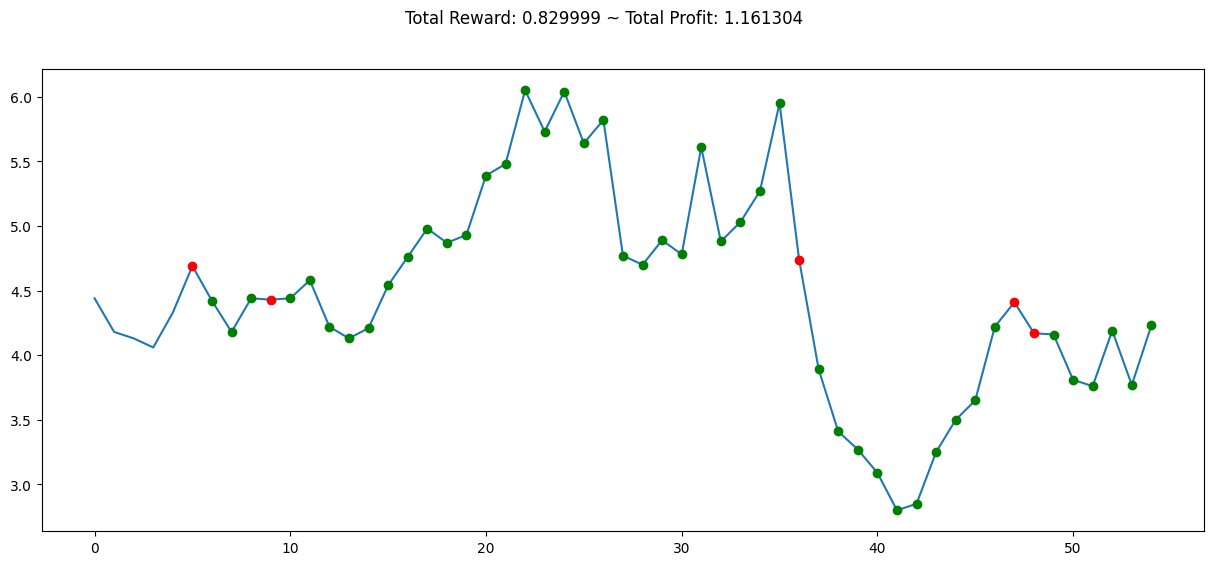

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(200,250), window_size=5)
obs = env.reset()

# Unpack the tuple
array_obs, dict_obs = obs

# Add a new axis to the array part
array_obs = array_obs[np.newaxis, ...]

while True:
    obs = array_obs
    action, _states = model.predict(obs)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()